Przygotowanie i wstępne przetwarzanie danych

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import mean_absolute_error

In [5]:
# Słownik z danymi (Lata 2001-2025)
data_dict = {
    2009: [10.4, 10.9, 11.1, 10.9, 10.7, 10.6, 10.7, 10.8, 10.9, 11.1, 11.4, 12.1],
    2008: [11.5, 11.3, 10.9, 10.3, 9.8, 9.4, 9.2, 9.1, 8.9, 8.8, 9.1, 9.5],
    2007: [15.1, 14.8, 14.3, 13.6, 12.9, 12.3, 12.1, 11.9, 11.6, 11.3, 11.2, 11.2],
    2006: [18.0, 18.0, 17.8, 17.2, 16.5, 15.9, 15.7, 15.5, 15.2, 14.9, 14.8, 14.8],
    2005: [19.4, 19.4, 19.2, 18.7, 18.2, 18.0, 17.9, 17.7, 17.6, 17.3, 17.3, 17.6],
    2004: [20.6, 20.6, 20.4, 19.9, 19.5, 19.4, 19.3, 19.1, 18.9, 18.7, 18.7, 19.0],
    2003: [20.6, 20.7, 20.6, 20.3, 19.8, 19.7, 19.6, 19.5, 19.4, 19.3, 19.5, 20.0],
    2002: [20.1, 20.2, 20.1, 19.9, 19.2, 19.4, 19.4, 19.5, 19.5, 19.5, 19.7, 20.0],
    2001: [15.7, 15.9, 16.1, 16.0, 15.9, 15.9, 16.0, 16.2, 16.3, 16.4, 16.8, 17.5],
    2025: [5.4, 5.4, 5.3, 5.2, 5.0, 5.2, 5.4, 5.5, 5.6, 5.6, 5.6, np.nan],
    2024: [5.4, 5.4, 5.3, 5.1, 5.0, 4.9, 5.0, 5.0, 5.0, 4.9, 5.0, 5.1],
    2023: [5.5, 5.6, 5.4, 5.3, 5.1, 5.1, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1],
    2022: [5.9, 5.9, 5.8, 5.6, 5.4, 5.2, 5.2, 5.2, 5.1, 5.1, 5.1, 5.2],
    2021: [7.0, 7.1, 6.9, 6.8, 6.6, 6.4, 6.3, 6.2, 6.1, 5.9, 5.8, 5.8],
    2020: [5.5, 5.5, 5.4, 5.8, 6.0, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.3], 
    2019: [6.1, 6.1, 5.9, 5.6, 5.4, 5.3, 5.2, 5.2, 5.1, 5.0, 5.1, 5.2],
    2018: [6.8, 6.8, 6.6, 6.3, 6.1, 5.8, 5.8, 5.8, 5.7, 5.7, 5.7, 5.8],
    2017: [8.5, 8.4, 8.0, 7.6, 7.3, 7.0, 7.0, 7.0, 6.8, 6.6, 6.5, 6.6],
    2016: [10.2, 10.2, 9.9, 9.4, 9.1, 8.7, 8.5, 8.4, 8.3, 8.2, 8.2, 8.2],
    2015: [11.9, 11.9, 11.5, 11.1, 10.7, 10.2, 10.0, 9.9, 9.7, 9.6, 9.6, 9.7],
    2014: [13.9, 13.9, 13.5, 13.0, 12.5, 12.0, 11.8, 11.7, 11.5, 11.3, 11.4, 11.4],
    2013: [14.2, 14.4, 14.3, 14.0, 13.6, 13.2, 13.1, 13.0, 13.0, 13.0, 13.2, 13.4],
    2012: [13.2, 13.4, 13.3, 12.9, 12.6, 12.3, 12.3, 12.4, 12.4, 12.5, 12.9, 13.4],
    2011: [13.1, 13.4, 13.3, 12.8, 12.4, 11.9, 11.8, 11.8, 11.8, 11.8, 12.1, 12.5],
    2010: [12.9, 13.2, 13.0, 12.4, 12.1, 11.7, 11.5, 11.4, 11.5, 11.5, 11.7, 12.4]
}

# Przetwarzanie danych
records = []
for year, values in data_dict.items():
    for month_idx, val in enumerate(values):
        if not np.isnan(val):
            date_str = f"{year}-{month_idx+1:02d}-01"
            records.append({'Data': date_str, 'Stopa': val})

df = pd.DataFrame(records)
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)
df = df.sort_index()



Eksploracja danych i analiza sezonowości

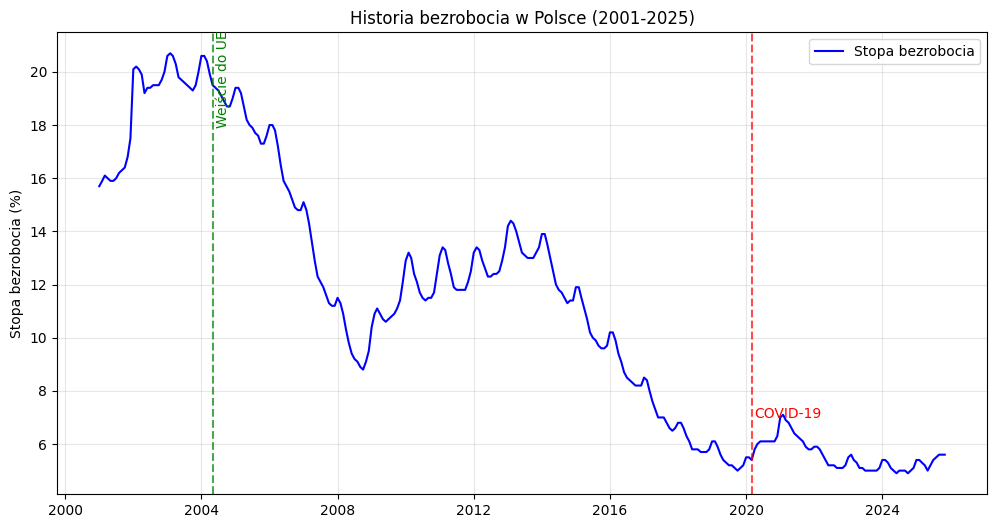

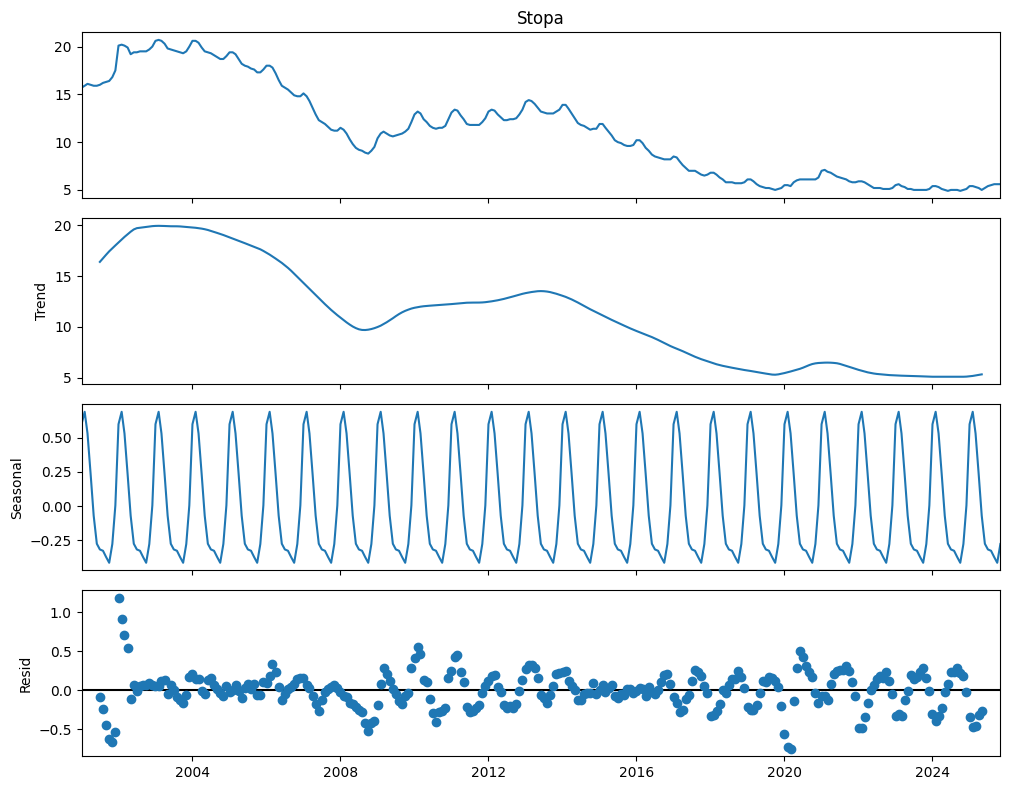

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Wykres
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Stopa'], label='Stopa bezrobocia', color='blue', linewidth=1.5)

# Wejście do UE i COVID-19
plt.axvline(pd.to_datetime('2004-05-01'), color='green', linestyle='--', alpha=0.7)
plt.text(pd.to_datetime('2004-06-01'), 18, 'Wejście do UE', color='green', rotation=90)

plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', alpha=0.7)
plt.text(pd.to_datetime('2020-04-01'), 7, 'COVID-19', color='red')

plt.title('Historia bezrobocia w Polsce (2001-2025)')
plt.ylabel('Stopa bezrobocia (%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# WYKRES 2 - sezonowość

plt.rcParams.update({'figure.figsize': (10, 8)})

result = seasonal_decompose(df['Stopa'], model='additive', period=12)

result.plot()
plt.show()


plt.rcParams.update({'figure.figsize': (6, 4)})

Sprawdzenie stacjonarności testem Dickey'a-Fullera

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series.dropna()) # Usuwamy NaN, bo ADF ich nie lubi
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    # Automatyczna interpretacja
    if result[1] <= 0.05:
        print("\nWNIOSEK: Szereg jest STACJONARNY (d=0). Można modelować.")
    else:
        print("\nWNIOSEK: Szereg jest NIESTACJONARNY. Wymagane różnicowanie (d>=1).")

# Uruchomienie testu na Twoich danych
print("--- Wyniki Testu Dickeya-Fullera ---")
adf_test(df['Stopa'])

--- Wyniki Testu Dickeya-Fullera ---
ADF Statistic: -2.2242
p-value: 0.1976
Critical Values:
	1%: -3.4537
	5%: -2.8718
	10%: -2.5722

WNIOSEK: Szereg jest NIESTACJONARNY. Wymagane różnicowanie (d>=1).


Selekcja i trening modelu (Model Selection)

In [5]:

full_model = pm.auto_arima(df['Stopa'], 
                           seasonal=True, m=12, 
                           d=1, D=1, 
                           start_p=0, start_q=0, 
                           max_p=3, max_q=3,
                           suppress_warnings=True)

print(full_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  299
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                  97.533
Date:                            Tue, 20 Jan 2026   AIC                           -187.065
Time:                                    14:37:59   BIC                           -172.441
Sample:                                01-01-2001   HQIC                          -181.203
                                     - 11-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9095      0.053     17.205      0.000       0.806       1.013
ma.L1         -0.6175      0.072   

Walidacja modelu na zbiorze testowym

Trening na danych do: 2023-11-01
Testowanie na okresie: 2023-12-01 - 2025-11-01

Błąd RMSE: 0.31
Interpretacja: Średnio model myli się o tyle punktów procentowych.


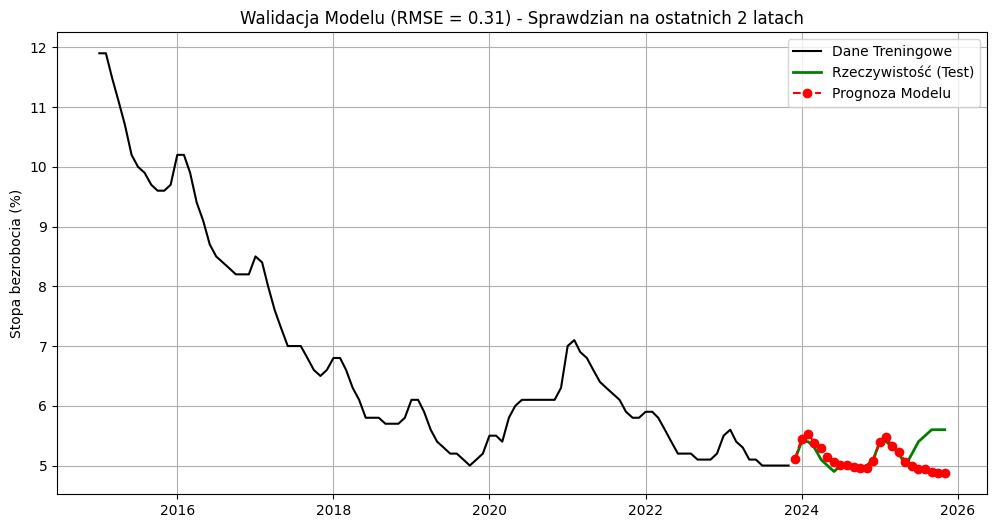

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. PODZIAŁ DANYCH 

test_size = 24

train = df['Stopa'].iloc[:-test_size]  
test = df['Stopa'].iloc[-test_size:]   

print(f"Trening na danych do: {train.index[-1].date()}")
print(f"Testowanie na okresie: {test.index[0].date()} - {test.index[-1].date()}")

# 2. TRENING MODELU NA ZBIORZE UCZĄCYM
model_test = pm.auto_arima(train, 
                           seasonal=True, m=12, 
                           d=1, D=1, 
                           start_p=0, start_q=0, 
                           max_p=3, max_q=3,
                           suppress_warnings=True)

# 3. PROGNOZA TESTOWA

prediction = model_test.predict(n_periods=test_size)

# 4. OCENA BŁĘDU
rmse = np.sqrt(mean_squared_error(test, prediction))
print(f"\nBłąd RMSE: {rmse:.2f}")


# 5. WYKRES WALIDACYJNY
plt.figure(figsize=(12, 6))


plt.plot(train.index[train.index >= '2015-01-01'], train[train.index >= '2015-01-01'], label='Dane Treningowe', color='black')


plt.plot(test.index, test, label='Rzeczywistość (Test)', color='green', linewidth=2)


plt.plot(test.index, prediction, label='Prognoza Modelu', color='red', linestyle='--', marker='o')

plt.title(f'Walidacja Modelu (RMSE = {rmse:.2f}) - Sprawdzian na ostatnich 2 latach')
plt.ylabel('Stopa bezrobocia (%)')
plt.legend()
plt.grid(True)
plt.show()

Prognozowanie i wizualizacja wyników

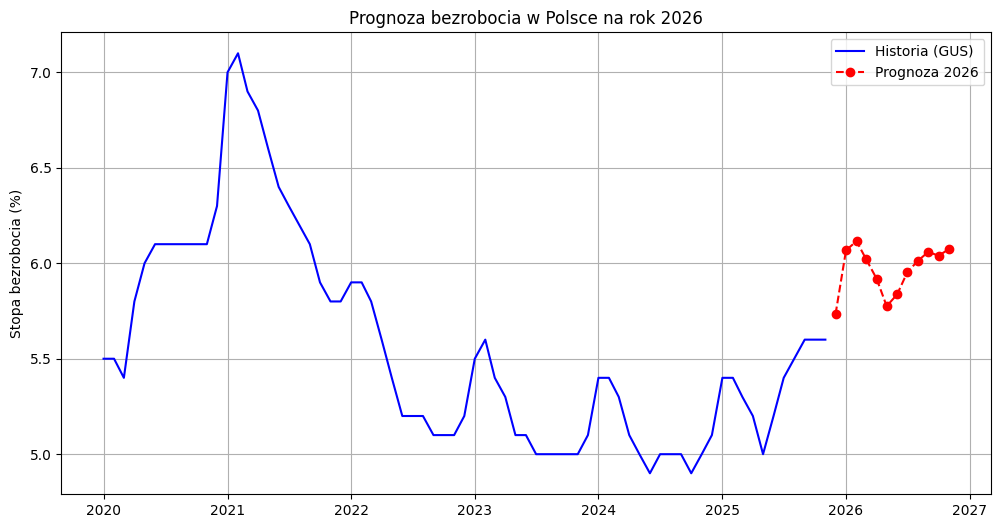

PROGNOZA LICZBOWA NA ROK 2026
         Data  Prognoza
0  2025-12-01      5.73
1  2026-01-01      6.07
2  2026-02-01      6.12
3  2026-03-01      6.02
4  2026-04-01      5.92
5  2026-05-01      5.78
6  2026-06-01      5.84
7  2026-07-01      5.95
8  2026-08-01      6.01
9  2026-09-01      6.06
10 2026-10-01      6.04
11 2026-11-01      6.07


In [ ]:
future_forecast = full_model.predict(n_periods=12)


last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')


plt.figure(figsize=(12, 6))


plt.plot(df.index[df.index >= '2020-01-01'], df['Stopa'][df.index >= '2020-01-01'], label='Historia (GUS)', color='blue')


plt.plot(future_dates, future_forecast, label='Prognoza 2026', color='red', marker='o', linestyle='--')

plt.title('Prognoza bezrobocia w Polsce na rok 2026')
plt.ylabel('Stopa bezrobocia (%)')
plt.legend()
plt.grid(True)
plt.show()



print("PROGNOZA LICZBOWA NA ROK 2026")
future_df = pd.DataFrame({'Data': future_dates, 'Prognoza': future_forecast.values.round(2)})
print(future_df)